# Customer habits of Ford GoBike Trip Data in 2018



## Investigation Overview

> In this investigation, I wanted to look at the amount of usage of GoBike service during different time periods to get an idea of the extent of use and to improve further services.

## Dataset Overview

> This document explores the Ford GoBike's trip data for public containing approximately 1,850,000 bike rides in 2018. The attributes included the trip start/end time,user type, gender, and age. Some data points were removed from the analysis due to the quality issue found within the age column

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
bike18_clean = pd.read_csv('clean_master_file.csv')

In [4]:
# calculating % split for the user type
customer = bike18_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = bike18_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / bike18_clean['bike_id'].count()
subscriber_proportion = subscriber / bike18_clean['bike_id'].count()

## Individual trips by subscription type

> Ford GoBike System currently offers 3 subscribtion types: Single Ride, Access Pass (24h or 72h) and Monthly Membership. Customers with a monthly membership ("Subscriber") make 88% of all customers in 2018 that used the system. 12% were casual riders ("Customer") using the bike share system ocasionally.

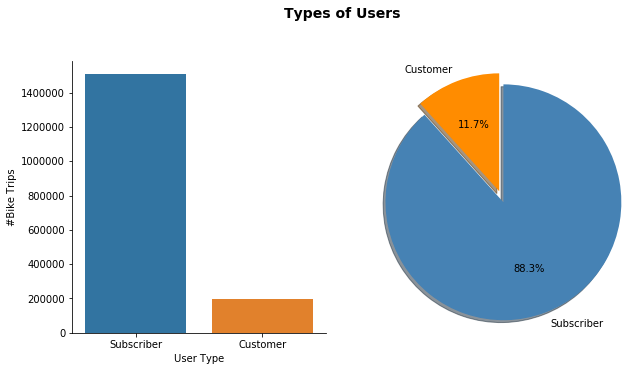

In [9]:
plt.figure(figsize = [10, 5])
plt.rc('axes.spines', top = False, right = False)

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=bike18_clean, x="user_type", order=bike18_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Types of Users', y=1.03, fontsize=14, fontweight='semibold');

## Daily and weekly habits by subscription type

> Based on the below heatmap, we can clearly indicate different renting habits for customers and subscribers and based on the renting purpose we can assign them to two different groups: leisure for customers and commute for subscribers. 

>#### Customers use the bike sharing system more often on weekends:
 * weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm. The system for this type is also more often used around the lunchtime than for subscribers.
 * weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm

>#### Subscribers use the bike sharing system mainly on weekdays:
 * weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
 * weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout entire weekends

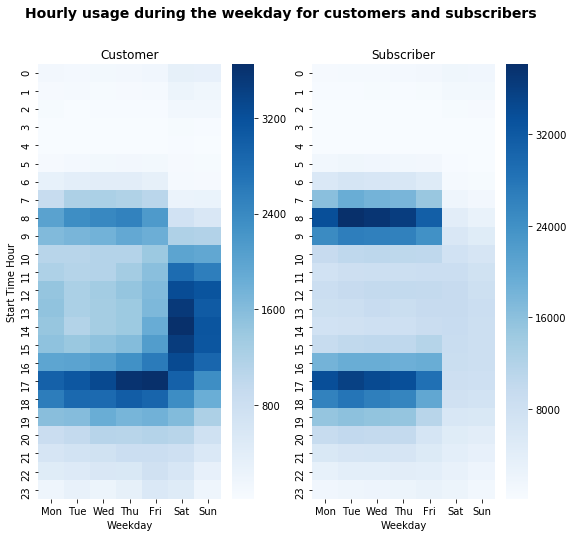

In [8]:
# Setting the weekday order
bike18_clean['start_time_weekday'] = pd.Categorical(bike18_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
bike18_customer = bike18_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
bike18_customer = bike18_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(bike18_customer, cmap="Blues")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
bike18_subscriber = bike18_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
bike18_subscriber = bike18_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(bike18_subscriber, cmap="Blues")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

## Length of trips by subscription type

> There is a difference in the trip duration between customers and subscribers. **Customers** trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. **Subscribers** on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

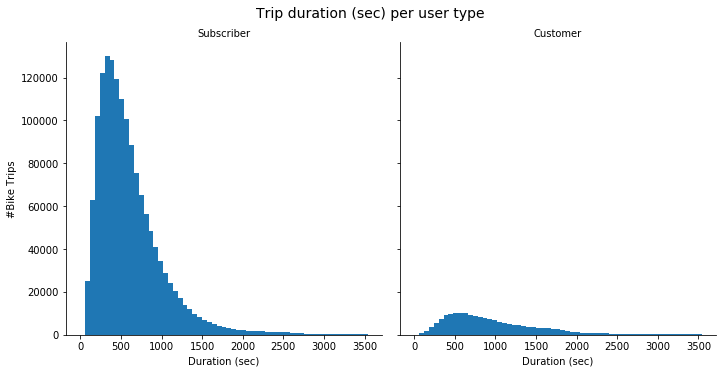

In [7]:
# code for the (histogram) duration (sec) distribution per user type

base_color = sns.color_palette()[0]

g = sns.FacetGrid(bike18_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) per user type', y=1.03, fontsize=14);

## Summary

> Renting a bike from Ford GoBike System is a very easy and accessible way of moving around in urban areas, both for pleasure and work. There are two types of clients using the system: subscribers who are mainly daily commuters, having short trips to and from work, and customers, usually tourists or occassional riders who use the system mainly on weekends for leisurely activities.

> The high usage shown especially for shorter distances is very encouraging from an environmental point of view and the company must continue campaigning in this direction to achieve a bigger user base and help reduce emissions.